In [ ]:
import numpy as np
import imageio as imageio
from scipy.signal import filtfilt, butter
import matplotlib.pyplot as plt

file_path = "matrix.tiff"

images = imageio.imread(file_path)
n, nx, ny = np.shape(images)
filtered_data = np.zeros((n, nx, ny))  
reshaped_data = np.reshape(images, (n, nx*ny))


x = images[:,100,100]  

order = 3
cutoff_freq = 3
sampling_freq = 150
nyquist_freq = sampling_freq / 2

cutoff_norm = cutoff_freq / nyquist_freq
b, a = butter(order, cutoff_norm, btype='low', analog=False)

for i in range(nx):  
    for j in range(ny): 
        x = images[:,i, j]  
        filtered_signal = filtfilt(b, a, x)
        filtered_data[:, i, j] = filtered_signal


filtered_image_array = np.asarray(filtered_data, dtype=np.uint8)

filtered_image_path = "filtered_image.tiff"
imageio.imwrite(filtered_image_path, filtered_image_array)

plt.figure(figsize=(10, 5))
plt.imshow(filtered_image_array[0, :, :], cmap='gray')
plt.colorbar()
plt.xlabel('Column')
plt.ylabel('Row')
plt.show() 
plt.autoscale 
plt.show()


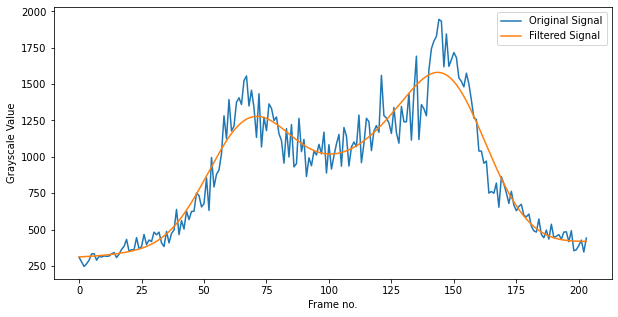

In [2]:
import numpy as np
import imageio
from scipy.signal import filtfilt, butter
import matplotlib.pyplot as plt

file_path = "matrix.tiff"

image = imageio.imread(file_path)
height, width = image.shape

filtered_data = np.zeros((height, width))
x = image[:, 100]

order = 3
cutoff_freq = 3
sampling_freq = 150
nyquist_freq = sampling_freq / 2

cutoff_norm = cutoff_freq / nyquist_freq
b, a = butter(order, cutoff_norm, btype='low', analog=False)

filtered_signal = filtfilt(b, a, x)

for num in range(width):
    filtered_data[:, num] = filtfilt(b, a, image[:, num])

plt.figure(figsize=(10, 5))
plt.plot(x, label='Original Signal')
plt.plot(filtered_signal, label='Filtered Signal')
plt.xlabel('Frame no.')
plt.ylabel('Grayscale Value')
plt.legend()
plt.show()
